In [27]:
# Importing libraries.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Loading and reading data set.
df_insurance = pd.read_csv('/Users/user/Documents/Certificates/Git Hub/datascienceTasks/data_set/insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [51]:
# Columns of the dataframe.
df_insurance.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [17]:
# Shape of the data.
df_insurance.shape

(1338, 7)

In [18]:
# Information of the data.
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# Statistics.
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
# Checking for missing values.
missing_values = (df_insurance.isnull().sum())/(len(df_insurance))*100
missing_values

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

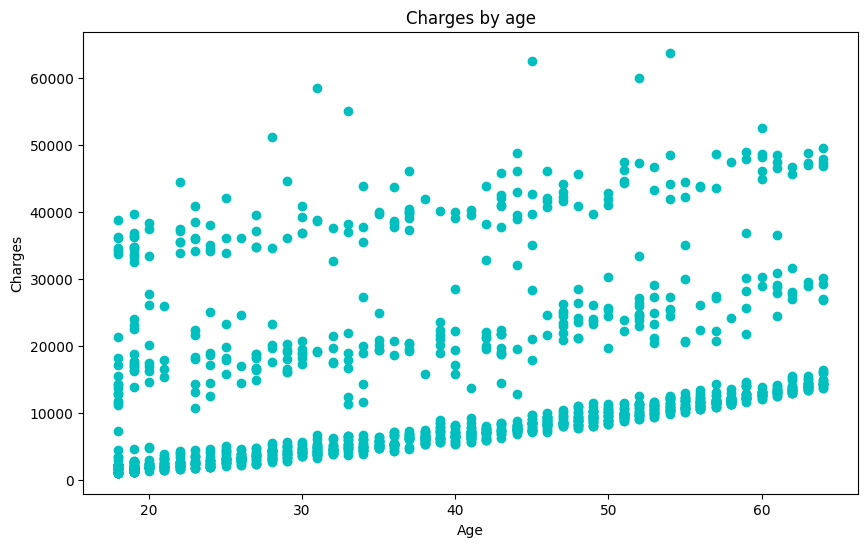

In [48]:
# Visualizing a scatter plot charges vs age.
x = df_insurance['age'].values.reshape(-1,1)
y = df_insurance['charges']

plt.figure(figsize=(10,6))
plt.scatter(x, y, c='c')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges by age')
plt.show()

In [54]:
# Splitting the dataset into train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Initializing the linear regresssion model.
charges_model = LinearRegression()

In [35]:
# Fitting the model to the training data.
charges_model.fit(x_train, y_train)

LinearRegression()

In [37]:
# Predicting charges on the test set.
y_pred = charges_model.predict(x_test)

In [38]:
# Calculating performance metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:{mse}")
print(f"R-Squared:{r2}")

Mean Squared Error:135983957.4805469
R-Squared:0.12408973539501944


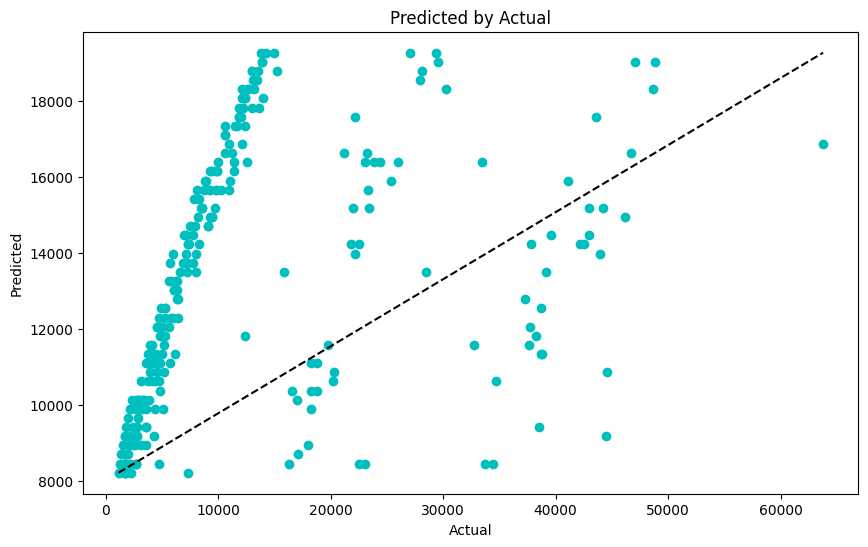

In [47]:
# Visualizing predicted and actual values using scatter plot and best 
# fit line.
plt.figure(figsize=[10, 6])
plt.scatter(y_test, y_pred, c='c')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted by Actual')
plt.show()

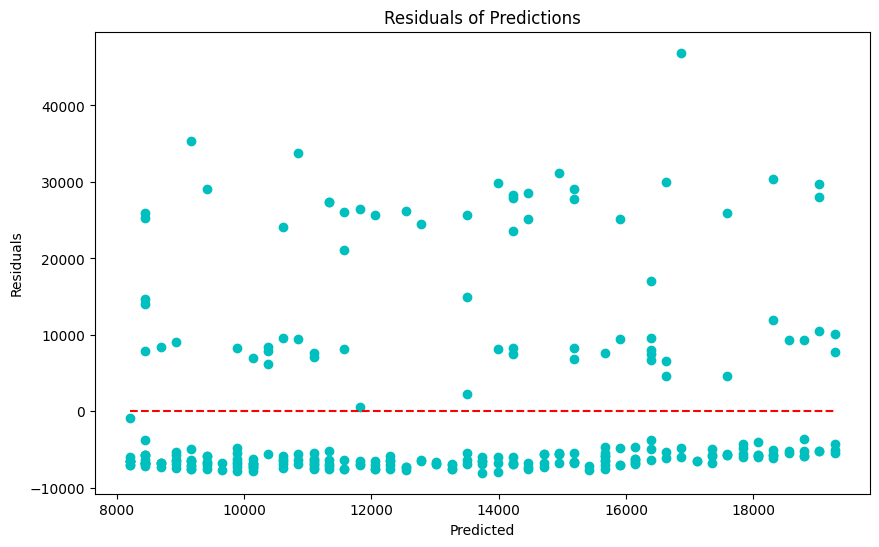

In [49]:
# Visualizing residuals using scatter plot.
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, c='c')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

In this case, R-Squared is closer to 0 and MSE is very high. And also scatter plot shows the model that does not good fit. These results indicate that the model is performing poorly and is not able to accurately capture the variance in the data or make accurate predictions.